<a href="https://colab.research.google.com/github/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/5_Tips_Entrenamiento_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal por gradiente descendiente

$$w^* = \arg \min_w J(w)=\|y-Xw\|^2_2$$

$$\nabla_w J(w) = \frac{2}{N}\left(X^\top\left(X w - y\right)\right) $$

$$w^t = w^{t-1} - \eta_t \nabla_w J(w)$$

NOTA: $\nabla_w J(w)$ se puede estimar con autodiff



theta_o: 
 [4 3]
theta_inv: 
 [[4.02496358]
 [2.96348022]]
theta_gd: 
 [[4.02496629]
 [2.96347497]]


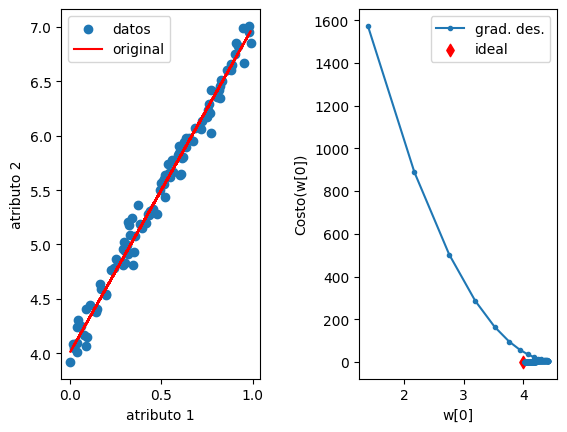

In [2]:
import numpy as np
import matplotlib.pyplot as plt

theta_o = np.array([4,3]) # parametros verdaderos
#simular datos
var = 0.01
np.random.seed(10)
X = np.random.rand(100, 1)
y = theta_o[0] + theta_o[1] * X + np.sqrt(var) *np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]  # añadir nivel dc modelo matricial
theta_inv = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # solución analítica por inversa

theta_list = []
cost_list = []
eta = 0.1 #learning rate
n_epochs = 1000
theta = np.random.randn(2,1) # punto inicial de la solución
for iteration in range(n_epochs):
    gradients = (2/X_b.shape[0])*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_list.append(theta)
    cost_list.append(np.linalg.norm(y-X_b.dot(theta))**2)
print('theta_o: \n',theta_o)
print('theta_inv: \n',theta_inv)
print('theta_gd: \n',theta)
plt.subplot(121)
plt.scatter(X_b[:,1],y,label='datos')
plt.plot(X_b[:,1],X_b.dot(theta_o),label='original',c='r')
plt.xlabel('atributo 1')
plt.ylabel('atributo 2')
plt.legend()

plt.subplot(122)
plt.plot(np.array(theta_list)[:,0],np.array(cost_list),'.-',label='grad. des.')
plt.scatter(theta_o[0],0,marker='d',s=40,c='r',label='ideal')
plt.legend()
plt.xlabel('w[0]')
plt.ylabel('Costo(w[0])')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

# Gradiente descendiente por lote, por mini-lotes y estocástico

* El gradiente descendiente por lote (batch) utiliza TODAS las instancias disponibles para actualizar $\nabla_w J(w)$ en cada epoca.

* El gradiente descendiente por mini-lotes (mini-batch) utiliza UN SUBCONJUNTO aleatorio de muestras de tamaño fijo (batch-size) para actualizar $\nabla_w J(w)$.

* El gradiente descendiente estocástico utiliza UNA MUESTRA aleatoria para actualizar $\nabla_w J(w)$.

NOTA: Una epoca en grandiente por mini-lotes y gradiente estocástico corresponde al recorrido aleatorio de todo el conjunto de datos, es decir, el número total de iteraciones corresponderá a:

$$TotalIter= \#epochs \frac{N}{BatchSize}$$


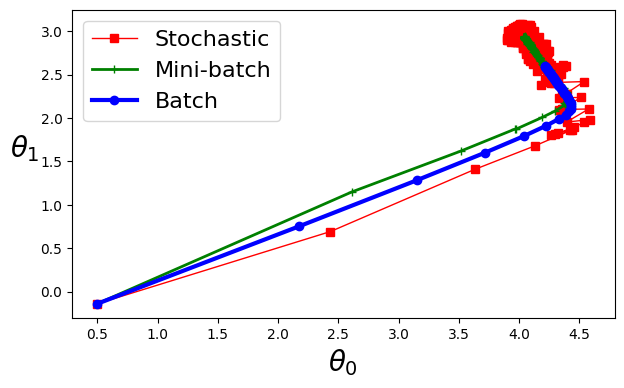

theta_s
 [[4.03577999]
 [2.98951515]]
theta_m
 [[4.03873909]
 [2.93560478]]
theta_b
 [[4.21344461]
 [2.59861593]]


In [3]:
np.random.seed(42) # fijar semilla para ejemplo ilustrativo

theta_path_bgd = []
theta_path_mgd = []
theta_path_sgd = []

n_epochs = 50 # número de epochs
batch_size = 32 # se sugiere colocar en 32,64,128,256
theta_s = np.random.randn(2,1)  # inicialización aleatoria - solución estocástico
theta_m = theta_s # solución mini lotes
theta_b = theta_s # solución por lote


theta_path_bgd.append(theta_b)
theta_path_mgd.append(theta_m)
theta_path_sgd.append(theta_s)

#decaimiento del learning rate para asegurar estabilidad cerca al mínimo
# más iteraciones menos learning rate !
t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

# sgd
N = X_b.shape[0]
for epoch in range(n_epochs): #n epochs
    for i in range(N):  # recorrer datos
        random_index = np.random.randint(N)  # escoger muestra aleatoria
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_s) - yi) #actualizar gradiente
        eta = learning_schedule(epoch * N + i) #actualizar learning rate
        theta_s = theta_s - eta * gradients #actualizar gradiente
        theta_path_sgd.append(theta_s)

# mini_batch
t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(N) #reorganizar muestras de forma aleatoria para nueva epoch
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, N, batch_size): #recorrer datos por mini lotes
        t += 1 #conteo iteraciones totales
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradients = 2/batch_size * xi.T.dot(xi.dot(theta_m) - yi)
        eta = learning_schedule(t)
        theta_m = theta_m - eta * gradients
        theta_path_mgd.append(theta_m)

#batch
for i in range(n_epochs):
    gradients = (2/X_b.shape[0])*X_b.T.dot(X_b.dot(theta_b) - y)
    theta_b = theta_b - eta * gradients
    theta_path_bgd.append(theta_b)

#graficar convergencia en  2D
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)


plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.scatter(theta_o[0],theta_o[1],marker='d',s=100)
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
#plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
print('theta_s\n',theta_s)
print('theta_m\n',theta_m)
print('theta_b\n',theta_b)

Bajo un buen manejo del optimizador, las tres estrategias convergen a puntos parecidos

# Curvas de aprendizaje - sobreajuste y subajuste



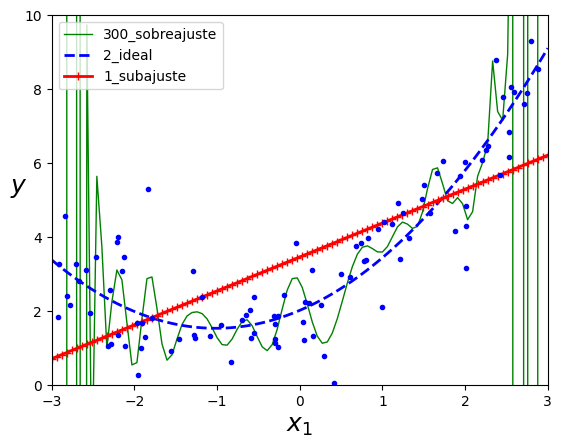

In [4]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


#datos de prueba
np.random.seed(40)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

#representación polinomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

#regresor lineal sobre mapeo no lineal
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

y_new = lin_reg.predict(X_new_poly)



labels = ['_sobreajuste','_ideal','_subajuste']
ii = 0
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree)+labels[ii], linewidth=width)
    ii+=1

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

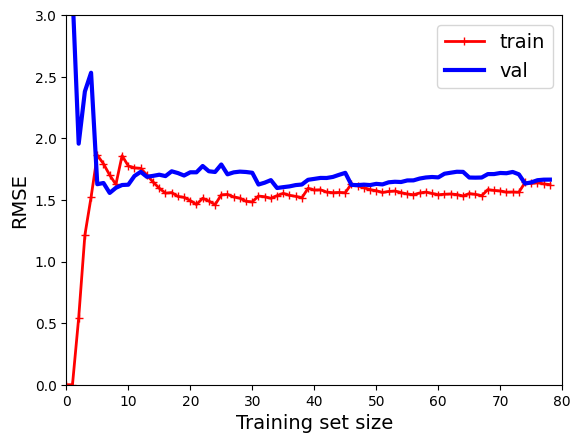

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(40)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

#curvas de aprendizaje
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=30)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

### **Modelo sub-entrenado** - más datos de entrenamiento no mejoran la generalización-se requiere un modelo más complejo o mejores características

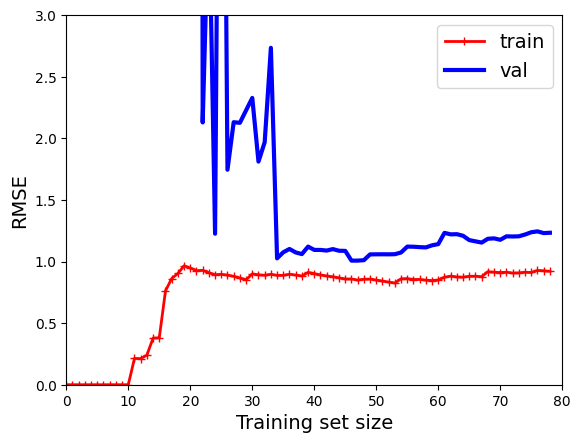

In [6]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

### **Modelo sobre entrenado** - se debe agregar más datos de entrenamiento para que el error de validación mejore o simplificar (regularizar) el modelo

### El balance entre sesgo y varianza

El error de generalización de un modelo puede ser expresado como la suma de tres errores diferentes:
#### Sesgo
Suposiciones erradas, ej: suponer datos lineales cuando en realidad son polinomiales. Un sesgo alto tiende a sub ajustar los datos de entrenamiento.

#### Varianza
Debido a la sensibilidad excesiva del modelo ante pequeñas variaciones en los datos de entrenamiento. Un modelo con muchos grados de libertad, tiende a generar alta varianza, y por  ende sobre entrenar los datos de entrenamiento.

#### Error irreducible
Debido al ruido de los datos. Solución: limpieza de datos, ajustar fuentes de captura, remover atípicos.

Modelos más complejos incrementan la varianza y reducen el sesgo. Modelos más simples incrementan el sesgo pero reducen la varainza (se requiere de un balance).

# Inicializadores, normalización por lotes, optimizadores y regularizadores en Deep Learning

In [7]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# Vanishing/Exploding Gradients Problem

# Desvanecimiento/no convergencia del gradiente

- En el backpropagation el gradiente de las capas iniciales no cambia (vanishing)

- En el backpropagation el gradiente se dispara

- En DL se generan gradientes inestables, diferentes capas aprenden a velocidades muy distintas!

- Posibles causas: incializacion tipo $\mathcal{N}(0,1)$ y activación logística, generan que las varianzas de las salidas de las capas sean más grandes que las varianzas de las entradas de las mismas. La sigmoide tiene problemas por saturación además del nivel dc 0.5

- Xavier Glorot y Yoshua Bengio demostraron dichas evidencias en 2010 [Paper](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf?source=post_page---------------------------)

In [8]:
def logit(z): #funcion sigmoid
    return 1 / (1 + np.exp(-z))

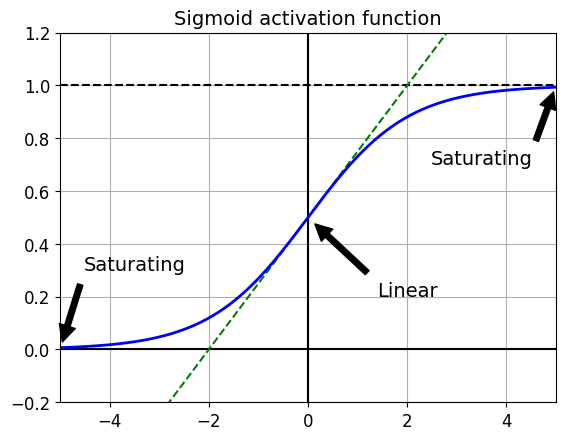

In [9]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

## Inicializadores Xavier (Glorot) y He

*   Se busca que la información fluya de forma estable en ambas direcciones: forward y backward
*   No la información no deberia ni morir (vanishing) ni explotar o saturarse.

* Clave: la varianza de las salidas de las capas se iguala a la varianza de las entradas de las capas. Además, se espera que el gradiente fluya con igual varianza antes y después de fluir por una capa.

* Dado que no es posible mantenar las claves anteriores por la variabilidad en el número de neuronas y entradas en una capa (fan-in fan-out de la capa), Glorot y Bengio proponen un modelo que mantiene un buen compromiso (inicialmente definido para activaciones sigmoid):

$$ w_0 \sim \mathcal{N}\left(0,1/fan_{avg}\right)$$
o
$$ w_0 \sim \mathcal{U}\left(-\sqrt{3/fan_{avg}},+\sqrt{3/fan_{avg}}\right)$$

donde $fan_{avg}= (fan_{in}+fan_{out})/2$

* Cuando $fan_{avg}=fan_{in}$ se obtiene el inicializador de Yann LeCun, o LeCun initialization (1990).

* Glorot puede mejorar el rendimiento y la velocidad de entrenamiento considerablemente!

Algunas otras alternativas de inicializadores se basan en las ideas de LeCun y Glorot modificando el uso de $fan_{avg}$ y $fan_{in}$ y el tipo de activación:


|Inicializador|Función de activación| $\sigma^2$ (Normal)|
|---|---|---|
|Glorot| linear, tanh, logist,softmax| 1/$fan_{avg}$|
|He| ReLU y variantes| 2/$fan_{in}$|
|LeCun| SELU| 1/$fan_{in}$|




In [10]:
#keras initializers
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'STFT',
 'STFTInitializer',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'stft',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [11]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

<Dense name=dense, built=False>

In [12]:
# se escala la variance o rango sobre el que se quiere muestrear
#https://www.tensorflow.org/api_docs/python/tf/keras/initializers/VarianceScaling
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

<Dense name=dense_1, built=False>

# Funciones de activación sin saturación
## Nonsaturating Activation Functions

* Aunque la activación en neuronas biológicas se asemejan a la función sigmoide, la saturación es un problema en el entrenamiento de la red (vanishing/exploding)

* Alternativa: ReLU -> simple de implementar y no saturada

* Problema de ReLU: dying ReLU, algunas neuronas marcan cero a la salida por el modelo de la $ReLU(x) = \max(0,x)$.

* El problema del dying ReLU es muy evidente para learning rates grandes, dado que el gradiente es cero para salidas negativas sobre la ReLU, las neuronas seguiran generando ceros!.



### Leaky ReLU

$Leaky ReLU(x) = \max(\alpha x,x)$

Algunas variantes de ReLU, buscando jugar con el factor de escala $\alpha$ para inducir un "coma" en las neuronas, del cual puedan volver en algún punto del entrenamiento se pueden encontrar en el siguiente [Paper](https://arxiv.org/abs/1505.00853) 2015

In [13]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

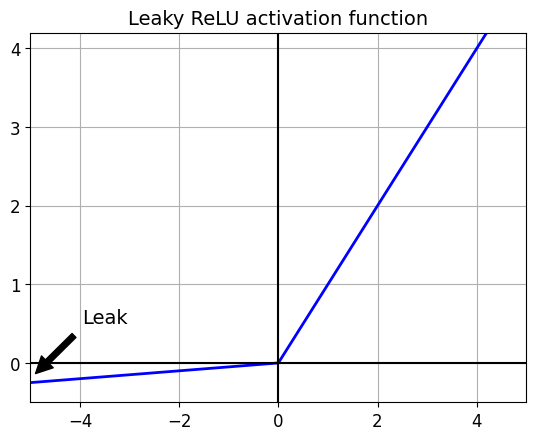

In [14]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [15]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['celu',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'glu',
 'hard_shrink',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'leaky_relu',
 'linear',
 'log_sigmoid',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'soft_shrink',
 'softmax',
 'softplus',
 'softsign',
 'sparse_plus',
 'sparsemax',
 'squareplus',
 'swish',
 'tanh',
 'tanh_shrink',
 'threshold']

In [16]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

Pruebas sobre Fashion MNIST en Leaky ReLU:

In [17]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4602 - loss: 1.7244 - val_accuracy: 0.7022 - val_loss: 0.9356
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7147 - loss: 0.8833 - val_accuracy: 0.7694 - val_loss: 0.7374
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7677 - loss: 0.7229 - val_accuracy: 0.7958 - val_loss: 0.6525
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7912 - loss: 0.6458 - val_accuracy: 0.8078 - val_loss: 0.6027
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8032 - loss: 0.5988 - val_accuracy: 0.8194 - val_loss: 0.5698
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8111 - loss: 0.5668 - val_accuracy: 0.8270 - val_loss: 0.5459
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8175 - loss: 0.5432 - val_accuracy: 0.8318 - val_loss: 0.5276
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8224 - loss: 0.5251 

Ahora con PReLU (parámetro $\alpha$ se aprende en el entrenamiento):

In [21]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4210 - loss: 1.8042 - val_accuracy: 0.7224 - val_loss: 0.9250
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7318 - loss: 0.8685 - val_accuracy: 0.7696 - val_loss: 0.7238
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7673 - loss: 0.7120 - val_accuracy: 0.7932 - val_loss: 0.6435
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7891 - loss: 0.6404 - val_accuracy: 0.8048 - val_loss: 0.5950
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8028 - loss: 0.5951 - val_accuracy: 0.8152 - val_loss: 0.5616
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8131 - loss: 0.5631 - val_accuracy: 0.8232 - val_loss: 0.5369
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8191 - loss: 0.5392 - val_accuracy: 0.8288 - val_loss: 0.5178
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8253 - loss: 0.5206 - 

### ELU

In [24]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

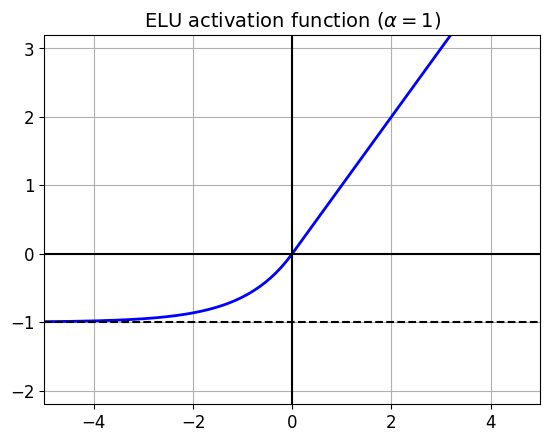

In [25]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()


$
ELU_\alpha(x) = \left\{\begin{split} \alpha(\exp(x)-1)& \quad if \quad & x < 0 \\
x & \quad if \quad & x \geq 0 \\
\end{split}\right.
$


In [26]:
keras.layers.Dense(10, activation="elu")

<Dense name=dense_8, built=False>

### SELU

* Esta función de activación se propusó en 2017 [Paper](https://arxiv.org/pdf/1706.02515.pdf) por Günter Klambauer, Thomas Unterthiner y Andreas Mayr.

* Garantiza una auto-normalización para modelos secuenciales.


$
SELU_\alpha(x) = \lambda\left\{\begin{split} \alpha(\exp(x)-1)& \quad if \quad & x < 0 \\
x & \quad if \quad & x \geq 0 \\
\end{split}\right.
$


In [27]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [28]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

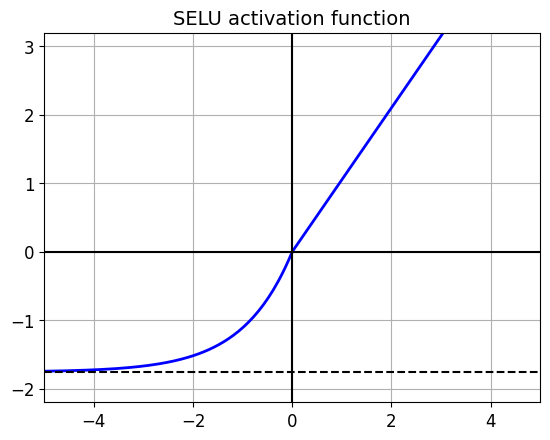

In [29]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

* En general, los hiperparámetros de SELU ($\lambda$ y $\alpha$) se ajustan de tal forma que la salida promedio de cada neurona este cercana a 0, y la desviación estandard cercana a 1 (asumiendo que las entradas se estandarizan de igual  manera).

* Para modelos profundos y densos se evita los problemas de vanishing/exploding

In [30]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


Utilizando SELU en  modelos densos:

In [31]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

<Dense name=dense_9, built=False>

Probando en Fashion MNIST:

In [32]:
np.random.seed(42)
tf.random.set_seed(42)

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

Antes de entrenar recuerde normalizar las entradas a media 0 y std 1:

In [35]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [36]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.4494 - loss: 1.5121 - val_accuracy: 0.7140 - val_loss: 0.8385
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7297 - loss: 0.7533 - val_accuracy: 0.7724 - val_loss: 0.6447
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7589 - loss: 0.6716 - val_accuracy: 0.7786 - val_loss: 0.6312
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7796 - loss: 0.5996 - val_accuracy: 0.8126 - val_loss: 0.5195
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8150 - loss: 0.5267 - val_accuracy: 0.8274 - val_loss: 0.5099


Si se prueba ReLU en vez de SELU:

In [37]:
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [39]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [40]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.1790 - loss: 2.1375 - val_accuracy: 0.2600 - val_loss: 1.7690
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3924 - loss: 1.4564 - val_accuracy: 0.5206 - val_loss: 1.1109
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.5824 - loss: 1.0169 - val_accuracy: 0.5694 - val_loss: 1.0964
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6310 - loss: 0.9384 - val_accuracy: 0.6424 - val_loss: 0.9260
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7099 - loss: 0.7559 - val_accuracy: 0.6848 - val_loss: 0.8296


No tan buen resultado, problemas de vanishing/exploding.

## Sugerencias:

* En general, el ranking de rendimiento es el seguiente: SELU>ELU>leakyReLU>ReLU>tanh>sigmoid.

* Si la red esta auto-normalizadas, la ELU puede rendir más que SELU (SELU no es suave en $x=0$).

* Si se requiere buena velocidad de cómputo se sugiere LeakyReLU.

* ReLU es la más utilizada por su buen compromiso, muchos aceleradore de cómputo están optimizados para trabajar con esta activación.

# Normalización por lote
## Batch Normalization - BN

* Aunque un buen inicializador y una buena función de activación previenen los problemas de vanishing/exploding, al inicio del entrenamiento, durante las iteraciones el vanishing/exploding puede volver!.

* En el 2015 [Paper](https://arxiv.org/abs/1502.03167), se propone la técnica Batch Normalization, que consiste en añadir una operación antes y después de cada capa.

* La normalización consiste de dos operaciones: escalamiento y traslación (dos nuevos parámetros por aprender en cada capa).

* Si la capa BN se añade como primera capa, entonces no es necesario escalar los datos de entrada.

* BN evalua la media y std de la entrada a la capa sobre el mini-batch (mini-lote) actual, con base en:


$\mathbf{\mu}_B = \frac{1}{N_B}\sum_{i=1}^{N_B} \mathbf{x}^{(i)}$

$\mathbf{\sigma}_B^2 = \frac{1}{N_B}\sum_{i=1}^{N_B} (\mathbf{x}^{(i)}-\mathbf{\mu}_B)^2$

$\hat{\mathbf{x}}^{(i)}= \frac{\mathbf{x}^{(i)}-\mathbf{\mu}_B}{\sqrt{\mathbf{\sigma}_B^2+\epsilon}}$

$\mathbf{z}^{(i)}=\mathbf{\gamma}\otimes \hat{\mathbf{x}}^{(i)}+\mathbf{\beta}$

* BN estandariza y luego reescala.

* Para datos nuevos se utliza promediado movil durante el entrenamiento.

* En resumen se estiman cuatro parámetros: $\gamma$ (escala), $\beta$ (traslación) se aprenden por backpropagation, y $\mu$ (media  final de entrada) y $\sigma$ (desviación final de entrada) por promediado móvil.

* NOTA: $\mu$ y $\sigma$ se estiman en entrenamiento pero solo se usen después de entrenar para evaluar datos nuevos.

* BN ha mostrado grandes resultados en procesado de imágenes, por ejemplo en ImageNet.

* El problema de vanishing se reduce e incluso permite utlizar activaciones saturadas como tanh  y sigmoid con BN.

* Además, BN es menos sensible a la inicialización de los pesos y  permite usar learning rates más grandes.

* BN se puede entender también como un regularizador al escalar y trasladar el flujo de información en la red.

* Problema: BN incluye más costo y operaciones en el entrenamiento y evaluación de la red.





In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [42]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_212 (Dense)                    │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_213 (Dense)                    │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_214 (Dense)                    │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [43]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables] #parámetros entrenables y no entrenables en BN

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [45]:
bn1.moving_mean # Access the moving mean
bn1.moving_variance # Access the moving variance

<Variable path=sequential_4/batch_normalization/moving_variance, shape=(784,), dtype=float32, value=[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [47]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6065 - loss: 1.1952 - val_accuracy: 0.8144 - val_loss: 0.5529
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7969 - loss: 0.5961 - val_accuracy: 0.8380 - val_loss: 0.4761
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8194 - loss: 0.5228 - val_accuracy: 0.8496 - val_loss: 0.4408
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8335 - loss: 0.4826 - val_accuracy: 0.8566 - val_loss: 0.4194
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8440 - loss: 0.4550 - val_accuracy: 0.8606 - val_loss: 0.4045
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8508 - loss: 0.4340 - val_accuracy: 0.8638 - val_loss: 0.3937
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8572 - loss: 0.4169 - val_accuracy: 0.8652 - val_loss: 0.3849
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8619 - loss: 0.4025 -

* En algunos casos se sugiere incluir BN antes de las funciones de activación (no hay evidencia completa al respecto).

* La capa antes de BN no necesita el bias dado que el BN lo incluye

In [48]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [51]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5624 - loss: 1.3412 - val_accuracy: 0.7910 - val_loss: 0.6569
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7760 - loss: 0.6967 - val_accuracy: 0.8198 - val_loss: 0.5461
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8017 - loss: 0.5996 - val_accuracy: 0.8368 - val_loss: 0.4935
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8165 - loss: 0.5483 - val_accuracy: 0.8480 - val_loss: 0.4614
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8270 - loss: 0.5146 - val_accuracy: 0.8552 - val_loss: 0.4394
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8342 - loss: 0.4899 - val_accuracy: 0.8582 - val_loss: 0.4231
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8399 - loss: 0.4706 - val_accuracy: 0.8612 - val_loss: 0.4106
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8458 - loss: 0.4547 -

# Recorte del gradiente
## Gradient Clipping

* Para evitar el problema de exploding se recorta (clip) el gradiente para que no supere un umbral dado.

* Método muy utilizado en modelos recurrentes.

* BN dificil de acoplar en RNN (escaldo y traslación de series temporales)

* Para evitar problemas de dirección, se sugiere trabajar con recorte por umbral sobre la norma del gradiente y no sobre los valores puntuales del mismo.

Los optimizadores de keras incluyen `clipnorm` y `clipvalue`:

In [52]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [53]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Reutilizar redes pre-entrenadas para evitar sobreajuste y problemas de convergencia (transfer  learning)

- Se puede aprovechar redes entrenadas en grandes bases de datos o en problemas parecidos, para regularizar o acelerar el entrenamiento en tareas similares.

- Se genera un modelo sobre 8 clases de FMNIST y se realizará el transfer learning a un problema bi clase


In [54]:
def split_dataset(X, y): # particionar Fashion MNIST
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [55]:
X_train_A.shape

(43986, 28, 28)

In [56]:
X_train_B.shape

(200, 28, 28)

In [57]:
y_train_A[:30]


array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [58]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [59]:
print(np.unique(y_train_A),np.unique(y_train_B))

[0 1 2 3 4 5 6 7] [0. 1.]


# Entrenamiento del modelo A

In [60]:
tf.random.set_seed(42)
np.random.seed(42)

In [61]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [62]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [63]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7149 - loss: 0.8670 - val_accuracy: 0.8630 - val_loss: 0.3918
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8694 - loss: 0.3759 - val_accuracy: 0.8809 - val_loss: 0.3348
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8831 - loss: 0.3294 - val_accuracy: 0.8924 - val_loss: 0.3104
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8894 - loss: 0.3078 - val_accuracy: 0.8986 - val_loss: 0.2961
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8949 - loss: 0.2941 - val_accuracy: 0.9028 - val_loss: 0.2868
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8990 - loss: 0.2838 - val_accuracy: 0.9051 - val_loss: 0.2798
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9019 - loss: 0.2756 - val_accuracy: 0.9066 - val_loss: 0.2740
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9048 - loss: 0.2686 - 

# Guardamos el modelo en formato h5 para cargar los pesos a la hora de entrenar el modelo B

In [64]:
model_A.save("my_model_A.h5")

# Entrenamiento convencional del modelo B

In [65]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [66]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [67]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step - accuracy: 0.5428 - loss: 0.7719 - val_accuracy: 0.6714 - val_loss: 0.5723
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7185 - loss: 0.5617 - val_accuracy: 0.7657 - val_loss: 0.4522
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7923 - loss: 0.4373 - val_accuracy: 0.8448 - val_loss: 0.3690
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8900 - loss: 0.3523 - val_accuracy: 0.8966 - val_loss: 0.3100
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9191 - loss: 0.2913 - val_accuracy: 0.9300 - val_loss: 0.2665
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9342 - loss: 0.2462 - val_accuracy: 0.9412 - val_loss: 0.2341
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9488 - loss: 0.2129 - val_accuracy: 0.9584 - val_loss: 0.2090
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9645 - loss: 0.1876 - val_accuracy: 0.9686 - val_loss: 0.1892

In [68]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_215 (Dense)                    │ (None, 300)                 │         235,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_216 (Dense)                    │ (None, 100)                 │          30,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_217 (Dense)                    │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,948 (1.03 MB)

 Trainable params: 268,578 (1.02 MB)

 Non-trainable params: 2,368 (9.25 KB)

 Optimizer params: 2 (12.00 B)

# Aplicar transfer learning desde el modelo A al modelo B

In [69]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])  # cargar capas preentrenadas!
#tambien se puede trabajar por modelo funcional fijando como entrada y salida las capas de interes
#model_B_on_A = keras.Model(inputs=model_A.input,outputs=model_A.get_layer('???').output)
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [70]:
model_A_clone = keras.models.clone_model(model_A) #clonar arquitectura del modelo
model_A_clone.set_weights(model_A.get_weights()) #asignar valores de pesos en modelo A

In [72]:
for layer in model_B_on_A.layers[:-1]: #definir capas no entrenables para transfer learning
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 391ms/step - accuracy: 0.0343 - loss: 1.5628 - val_accuracy: 0.0700 - val_loss: 1.4659
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0395 - loss: 1.4122 - val_accuracy: 0.0903 - val_loss: 1.3289
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0625 - loss: 1.2759 - val_accuracy: 0.1258 - val_loss: 1.2056
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1090 - loss: 1.1540 - val_accuracy: 0.1714 - val_loss: 1.0958


In [73]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True #todas las capas se entrenan, se utiliza el Transfer learning como inicializador

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.2298 - loss: 0.9637 - val_accuracy: 0.5365 - val_loss: 0.7015
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6239 - loss: 0.6279 - val_accuracy: 0.6998 - val_loss: 0.5241
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7780 - loss: 0.4662 - val_accuracy: 0.8256 - val_loss: 0.4164
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8849 - loss: 0.3665 - val_accuracy: 0.8966 - val_loss: 0.3437
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9197 - loss: 0.2998 - val_accuracy: 0.9320 - val_loss: 0.2921
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9513 - loss: 0.2528 - val_accuracy: 0.9513 - val_loss: 0.2539
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9650 - loss: 0.2187 - val_accuracy: 0.9696 - val_loss: 0.2249
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9719 - loss: 0.1929 - val_accuracy: 0.9736 - val_loss: 0.2023

Evaluaciones:

In [74]:
model_B.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9867 - loss: 0.0933


[0.0979023426771164, 0.9829999804496765]

In [75]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9811 - loss: 0.1256


[0.12264858186244965, 0.9835000038146973]

Se obtiene  una mejora!

# Optimizadores

* Gradiente  descendiente:

$$\theta \leftarrow \theta -\eta \nabla_\theta J(\theta)$$

* Momentum: considera gradientes previos

$$m  \leftarrow \beta m - \nabla_\theta J(\theta)$$

$$\theta \leftarrow \theta + m $$

$\beta$: hiperparámetro momentum


* Los algoritmos basados en momentum añaden mayor velocidad de
convergencia.

* En keras el optimizador SGD permite incluir el hiperparámetro de momentum.

* Además, algunas variantes alrededor de los filosofía de mementum incluyen Nestrov, AdaGrad, RMSProp, Adam, Nadam, AdaDelta

In [76]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9) #como incluir momentum en SGD

## Nesterov Accelerated Gradient

In [77]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True) #nestrov cálcula el gradiente teniendo en cuenta la dirección del momentum

## AdaGrad

In [78]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001) # incluye correción de dirección

## RMSProp

In [79]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9) # Mejora adaGrad para estabilizar la convergencia

## Adam Optimization

In [80]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999) # cálcula el momentum de forma adaptativa

## Adamax Optimization

In [81]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999) #cambia la norma l2 en adam con norma infinito

## Nadam Optimization

In [82]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999) # adam + Nestrov -> cálcula gradiente de función con desplazamiento por momentum

# Comparación de los optimizadores:

![optimizadores](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/optimizadores.gif?raw=1)

## Learning Rate Scheduling

### Power Scheduling

```lr = lr0 / (1 + steps / s)**c```

* Keras usa `c=1` y `s = 1 / decay`

In [83]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)

In [84]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [85]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7898 - loss: 0.6035 - val_accuracy: 0.8636 - val_loss: 0.3993
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8621 - loss: 0.3835 - val_accuracy: 0.8702 - val_loss: 0.3684
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8760 - loss: 0.3460 - val_accuracy: 0.8780 - val_loss: 0.3523
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8838 - loss: 0.3218 - val_accuracy: 0.8806 - val_loss: 0.3415
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8909 - loss: 0.3036 - val_accuracy: 0.8830 - val_loss: 0.3343
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8963 - loss: 0.2885 - val_accuracy: 0.8842 - val_loss: 0.3301
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9008 - loss: 0.2756 - val_accuracy: 0.8854 - val_loss: 0.3272
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9059 - loss: 0.2641 - 

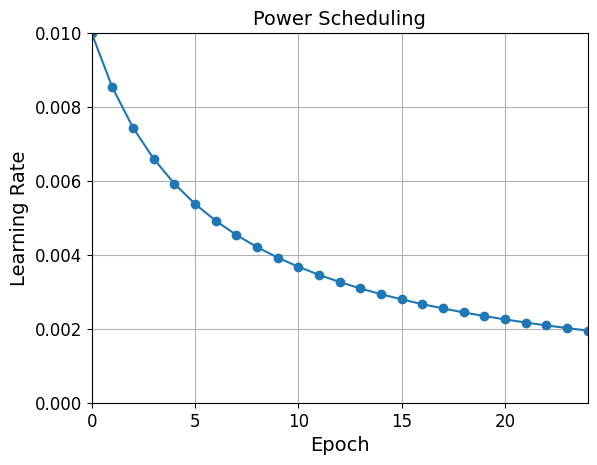

In [86]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

```lr = lr0 * 0.1**(epoch / s)```

In [87]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [88]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [89]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [90]:
#los callbacks permiten realizar operaciones durante procesos sobre batch y epochs
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7540 - loss: 1.0042 - val_accuracy: 0.7824 - val_loss: 0.7721 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8095 - loss: 0.6126 - val_accuracy: 0.8012 - val_loss: 0.7486 - learning_rate: 0.0089
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8222 - loss: 0.5885 - val_accuracy: 0.7988 - val_loss: 0.7393 - learning_rate: 0.0079
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8276 - loss: 0.5553 - val_accuracy: 0.8394 - val_loss: 0.6884 - learning_rate: 0.0071
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8499 - loss: 0.4948 - val_accuracy: 0.8536 - val_loss: 0.5328 - learning_rate: 0.0063
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8569 - loss: 0.4491 - val_accuracy: 0.8612 - val_loss: 0.4989 - learning_rate: 0.0056
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8713 - l

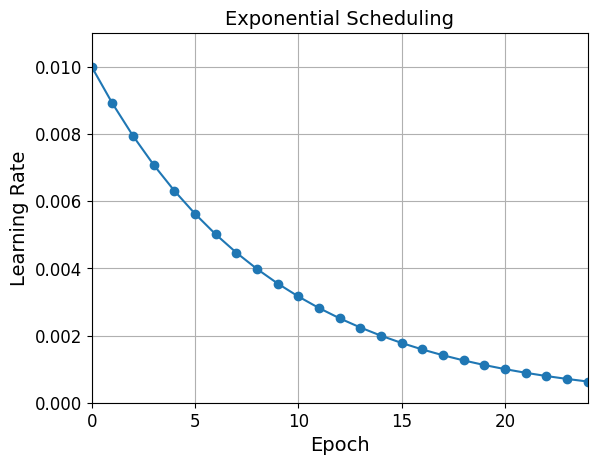

In [92]:
plt.plot(history.epoch, history.history["learning_rate"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### tf.keras schedulers

In [98]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7917 - loss: 0.5953 - val_accuracy: 0.8582 - val_loss: 0.4028
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8635 - loss: 0.3841 - val_accuracy: 0.8674 - val_loss: 0.3731
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8761 - loss: 0.3484 - val_accuracy: 0.8738 - val_loss: 0.3578
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8834 - loss: 0.3258 - val_accuracy: 0.8754 - val_loss: 0.3484
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8899 - loss: 0.3092 - val_accuracy: 0.8778 - val_loss: 0.3417
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8945 - loss: 0.2961 - val_accuracy: 0.8790 - val_loss: 0.3368
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8983 - loss: 0.2853 - val_accuracy: 0.8790 - val_loss: 0.3330
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9020 - loss: 0.2763 -

Para scheduling constantes:

In [99]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

# Regulizar para evitar sobreajuste en Deep Learning

## $\ell_1$ and $\ell_2$ regularization

* Agrega al costo en backpropagation la norma l1 ($\|w\|_1$) y/o l2 ($\|w\|_2$) de la respectiva capa

In [100]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [101]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7957 - loss: 3.1953 - val_accuracy: 0.8406 - val_loss: 0.7095
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8229 - loss: 0.7290 - val_accuracy: 0.8412 - val_loss: 0.6889


In [102]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7946 - loss: 3.2955 - val_accuracy: 0.8422 - val_loss: 0.7083
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8215 - loss: 0.7324 - val_accuracy: 0.8418 - val_loss: 0.6876


## Dropout

* Apaga aleatoriamente neuronas en la respectiva capa.

In [103]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7639 - loss: 0.7355 - val_accuracy: 0.8668 - val_loss: 0.3678
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8426 - loss: 0.4300 - val_accuracy: 0.8758 - val_loss: 0.3443


## Alpha Dropout

* Dropout manteniendo la media y varianza de las entradas de la capa.
* Mantiene el concepto de auto-normalización (self-normalizing)

In [104]:
tf.random.set_seed(42)
np.random.seed(42)

In [108]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7155 - loss: 0.7989 - val_accuracy: 0.8478 - val_loss: 0.5550
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7929 - loss: 0.5629 - val_accuracy: 0.8568 - val_loss: 0.5287
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8022 - loss: 0.5278 - val_accuracy: 0.8602 - val_loss: 0.4830
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8114 - loss: 0.5089 - val_accuracy: 0.8552 - val_loss: 0.4906
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8161 - loss: 0.4911 - val_accuracy: 0.8686 - val_loss: 0.4375
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8192 - loss: 0.4853 - val_accuracy: 0.8668 - val_loss: 0.4359
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8240 - loss: 0.4742 - val_accuracy: 0.8612 - val_loss: 0.4727
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8285 - loss: 0.4606 -

In [109]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8594 - loss: 0.5030


[0.514473557472229, 0.8578000068664551]

In [110]:
model.evaluate(X_train_scaled, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8754 - loss: 0.3824


[0.3855138421058655, 0.8776545524597168]

In [111]:
history = model.fit(X_train_scaled, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8427 - loss: 0.4170


## MC Dropout

* Estimación de salida después de entrenar red por simulación de Monte-Carlo (varias realizaciones del  experimento), en donde la aleatoriedad es controlada por el Dropout.

* Cada evaluación de una nueva muestra puede variar su  salida por el Dropout.

* Se generan varias corridas para predecir la salida de un punto con la red entrenada, y la predicción final sera el promedio muestral de las predicciones sobre el experimento de Monte-Carlo.

* MC Dropot se relaciona con inferencia Bayesiana aproximada y provee una alternativa para cuantificar la incertidumbre del modelo en DL.

In [112]:
tf.random.set_seed(42)
np.random.seed(42)

In [113]:
model(X_test_scaled,training=True).shape

TensorShape([10000, 10])

In [114]:
y_probas = np.stack([model(X_test_scaled, training=True) # se activa training en True para que el Dropout se aplique
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)
y_probas.shape

(100, 10000, 10)

In [115]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [116]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.37, 0.  , 0.16, 0.  , 0.47]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.74]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.43, 0.  , 0.54]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.15, 0.  , 0.71]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.41, 0.  , 0.05, 0.  , 0.53]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.09, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.03, 0.  , 0

In [117]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.11, 0.  , 0.79]],
      dtype=float32)

In [118]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.14, 0.  , 0.22]],
      dtype=float32)

In [119]:
y_pred = np.argmax(y_proba, axis=1)

In [120]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8669

In [121]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [122]:
tf.random.set_seed(42)
np.random.seed(42)

In [123]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [124]:
mc_model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_alpha_dropout (MCAlphaDropout)    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_265 (Dense)                    │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_alpha_dropout_1 (MCAlphaDropout)  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_266 (Dense)                    │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_alpha_dropout_2 (MCAlphaDropout)  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_267 (Dense)                    │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [126]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [127]:
mc_model.set_weights(model.get_weights())

Now we can use the model with MC Dropout:

In [128]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.08, 0.  , 0.82]],
      dtype=float32)

## Max norm

* Se restringe la capa a que su norma no supere un determinado valor durante el backpropagation.

In [129]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [130]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8042 - loss: 0.5808 - val_accuracy: 0.8686 - val_loss: 0.3727
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8665 - loss: 0.3736 - val_accuracy: 0.8704 - val_loss: 0.3605
